In [1]:
import pandas as pd
df = pd.read_csv('traffic.csv')
df

,DateTime,CellName,ID,Traffic
0,01-11-2015 00:00,15,20151101001,15.13867
1,01-11-2015 01:00,13,20151101011,2.05516
2,01-11-2015 02:00,10,20151101021,71.55308
3,01-11-2015 03:00,7,20151101031,557.98491
4,01-11-2015 04:00,9,20151101041,0.98166
...,...,...,...,...
48115,30-06-2017 19:00,11,20170630194,0.13851
48116,30-06-2017 20:00,30,20170630204,18.79667
48117,30-06-2017 21:00,16,20170630214,110.87961
48118,30-06-2017 22:00,22,20170630224,100.47013


In [2]:
df['DateTime']

0        01-11-2015 00:00
1        01-11-2015 01:00
2        01-11-2015 02:00
3        01-11-2015 03:00
4        01-11-2015 04:00
               ...       
48115    30-06-2017 19:00
48116    30-06-2017 20:00
48117    30-06-2017 21:00
48118    30-06-2017 22:00
48119    30-06-2017 23:00
Name: DateTime, Length: 48120, dtype: object

In [3]:
df1 = df.reset_index()['Traffic']
df1.shape

(48120,)

In [4]:
df1

0         15.13867
1          2.05516
2         71.55308
3        557.98491
4          0.98166
           ...    
48115      0.13851
48116     18.79667
48117    110.87961
48118    100.47013
48119    630.35936
Name: Traffic, Length: 48120, dtype: float64

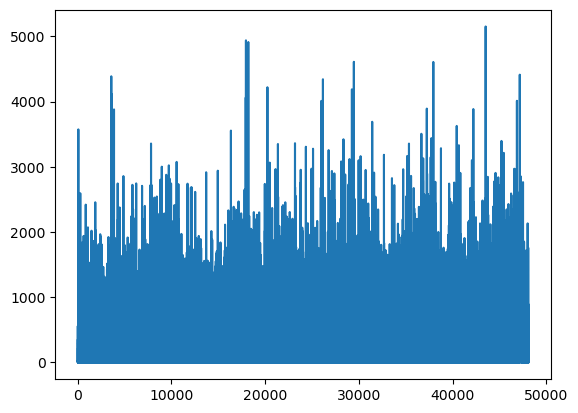

In [5]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [6]:
import numpy as np
df1

0         15.13867
1          2.05516
2         71.55308
3        557.98491
4          0.98166
           ...    
48115      0.13851
48116     18.79667
48117    110.87961
48118    100.47013
48119    630.35936
Name: Traffic, Length: 48120, dtype: float64

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
df1

array([[0.00293916],
       [0.00039901],
       [0.01389198],
       ...,
       [0.0215272 ],
       [0.0195062 ],
       [0.12238382]])

In [9]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [10]:
training_size,test_size

(31278, 16842)

In [11]:
train_data,test_data

(array([[2.93916198e-03],
        [3.99007847e-04],
        [1.38919794e-02],
        ...,
        [5.93738650e-02],
        [4.31535619e-04],
        [9.68183661e-05]]),
 array([[2.50141941e-05],
        [1.40549037e-02],
        [6.68589063e-02],
        ...,
        [2.15271972e-02],
        [1.95062040e-02],
        [1.22383820e-01]]))

In [12]:
import numpy

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [13]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [14]:
X_train.shape , y_train.shape

((31177, 100), (31177,))

In [15]:
X_test.shape, y_test.shape

((16741, 100), (16741,))

In [16]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=120,batch_size=64,verbose=1)

Epoch 1/120
488/488 [==============================] - 92s 174ms/step - loss: 0.0053 - val_loss: 0.0063
Epoch 2/120
488/488 [==============================] - 77s 158ms/step - loss: 0.0053 - val_loss: 0.0063
Epoch 3/120
488/488 [==============================] - 80s 164ms/step - loss: 0.0053 - val_loss: 0.0063
Epoch 4/120
488/488 [==============================] - 67s 138ms/step - loss: 0.0053 - val_loss: 0.0063
Epoch 5/120
488/488 [==============================] - 79s 161ms/step - loss: 0.0053 - val_loss: 0.0062
Epoch 6/120
488/488 [==============================] - 79s 163ms/step - loss: 0.0053 - val_loss: 0.0062
Epoch 7/120
488/488 [==============================] - 81s 165ms/step - loss: 0.0053 - val_loss: 0.0063
Epoch 8/120
488/488 [==============================] - 82s 169ms/step - loss: 0.0053 - val_loss: 0.0063
Epoch 9/120
488/488 [==============================] - 78s 160ms/step - loss: 0.0052 - val_loss: 0.0062
Epoch 10/120
488/488 [==============================] - 79s 162m

488/488 [==============================] - 82s 169ms/step - loss: 0.0052 - val_loss: 0.0063
Epoch 80/120
488/488 [==============================] - 82s 168ms/step - loss: 0.0052 - val_loss: 0.0062
Epoch 81/120
488/488 [==============================] - 82s 168ms/step - loss: 0.0052 - val_loss: 0.0062
Epoch 82/120
488/488 [==============================] - 82s 169ms/step - loss: 0.0052 - val_loss: 0.0062
Epoch 83/120
488/488 [==============================] - 79s 163ms/step - loss: 0.0052 - val_loss: 0.0062
Epoch 84/120
488/488 [==============================] - 75s 153ms/step - loss: 0.0052 - val_loss: 0.0062
Epoch 85/120
488/488 [==============================] - 82s 168ms/step - loss: 0.0052 - val_loss: 0.0062
Epoch 86/120
488/488 [==============================] - 83s 169ms/step - loss: 0.0052 - val_loss: 0.0063
Epoch 87/120
488/488 [==============================] - 81s 166ms/step - loss: 0.0052 - val_loss: 0.0062
Epoch 88/120
488/488 [==============================] - 87s 179ms/st

In [22]:
import tensorflow as tf

In [23]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

524/524 [==============================] - 15s 28ms/step


In [24]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

260.3854558726028

In [26]:
math.sqrt(mean_squared_error(y_test,test_predict))

274.57954697499986

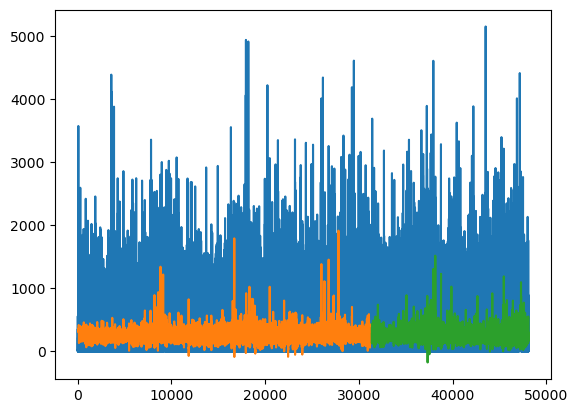

In [27]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [28]:
len(test_data)

16842

In [29]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 16501)

In [30]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [31]:
temp_input

[0.008111601840258767,
 0.025259515274000048,
 2.1686475291229945e-06,
 0.5649963856003947,
 0.19620182295152253,
 0.015103375835951494,
 0.039791327259737906,
 0.04710047709391383,
 0.039651378629619934,
 1.9084874853427966e-06,
 0.0005018894958021468,
 0.008375862316967799,
 0.09218637964940847,
 0.00099078846285106,
 0.03901747344354225,
 0.004578946850553376,
 9.587674210445913e-05,
 0.0036632242677972237,
 0.02676032614626069,
 0.06763502778054957,
 0.3517765409122132,
 0.07310304245832881,
 0.0033360652467721687,
 0.07105263572761107,
 0.002217940091447886,
 0.27028784907138903,
 0.05454020008916733,
 0.03969930826395428,
 0.019517899597342923,
 0.09999591820540266,
 0.008910597989043628,
 0.011688355898877763,
 0.2927697112761696,
 0.11920148402123025,
 0.055143664608629864,
 0.03538311140866172,
 0.0954785904553679,
 0.02223422673146624,
 0.05216534271996984,
 0.015207084560269453,
 0.008114853840806019,
 0.004136352488311611,
 0.001969462010230564,
 0.0021953896518321623,
 0.0

In [32]:
from numpy import array

lst_output=[]
n_steps=16500
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [2.52595153e-02 2.16864753e-06 5.64996386e-01 ... 2.15271972e-02
 1.95062040e-02 1.22383820e-01]
0 day output [[0.04413668]]
1 day input [2.16864753e-06 5.64996386e-01 1.96201823e-01 ... 1.95062040e-02
 1.22383820e-01 4.41366807e-02]
1 day output [[0.04639196]]
2 day input [0.56499639 0.19620182 0.01510338 ... 0.12238382 0.04413668 0.04639196]
2 day output [[0.04997503]]
3 day input [0.19620182 0.01510338 0.03979133 ... 0.04413668 0.04639196 0.04997503]
3 day output [[0.05266009]]
4 day input [0.01510338 0.03979133 0.04710048 ... 0.04639196 0.04997503 0.05266009]
4 day output [[0.05567386]]
5 day input [0.03979133 0.04710048 0.03965138 ... 0.04997503 0.05266009 0.05567386]
5 day output [[0.05964266]]
6 day input [4.71004771e-02 3.96513786e-02 1.90848749e-06 ... 5.26600927e-02
 5.56738600e-02 5.96426614e-02]
6 day output [[0.06399876]]
7 day input [3.96513786e-02 1.90848749e-06 5.01889496e-04 ... 5.56738600e-02
 5.96426614e-02 6.39987588e-02]
7 day output [[0.06807649]]
8 da

In [33]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [34]:
import matplotlib.pyplot as plt

In [35]:
len(df1)

48120

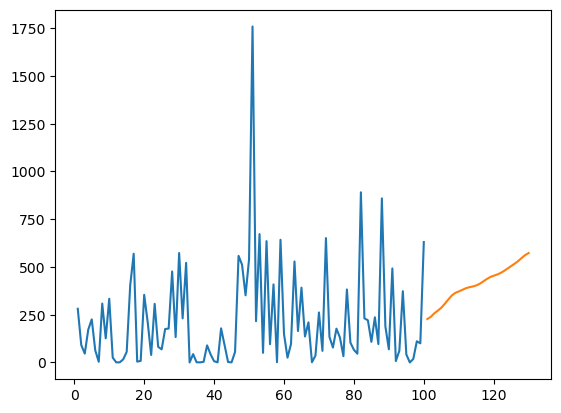

In [36]:
plt.plot(day_new,scaler.inverse_transform(df1[48020:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

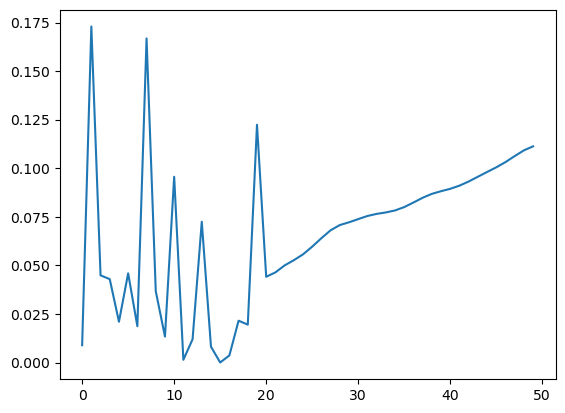

In [37]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[48100:])

In [38]:
df3=scaler.inverse_transform(df3).tolist()

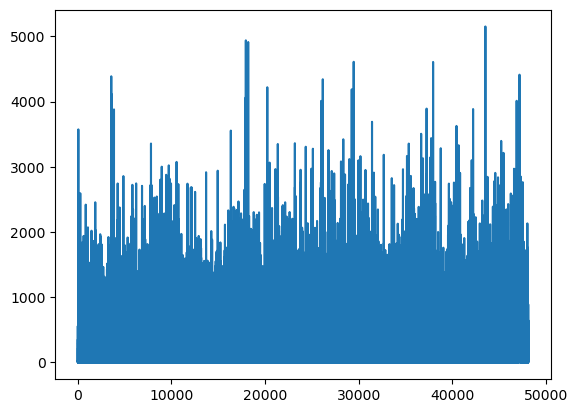

In [39]:
plt.plot(df3)